In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Charger les données
data = pd.read_csv("kmp_results.csv")

# Convertir les temps en ms
data['Temps d\'exécution'] = data['Temps d\'exécution'] / 1000

# Trier les données par ordre croissant selon le 'Nombre de lignes'
data_sorted = data.sort_values(by='Nombre de lignes', ascending=True)

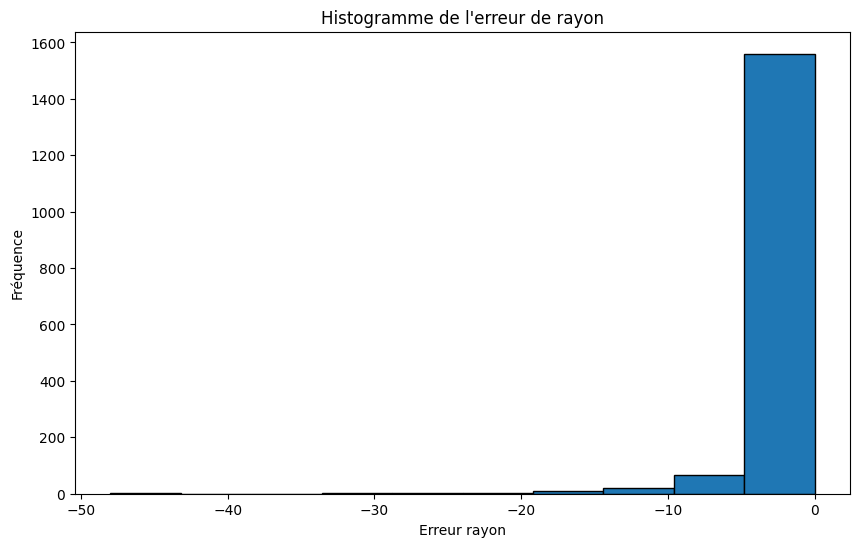

In [4]:
# Graphique 1: Nombre de lignes vs Temps d'exécution
plt.figure(figsize=(10, 6))
plt.plot(data['Nombre de lignes'], data['Temps d\'exécution'], marker='o')
plt.xlabel('Nombre de lignes')
plt.ylabel('Temps d\'exécution (ms)')
plt.title('Graphe du temps d\'exécution en fonction du nombre de lignes')
plt.grid(True)
plt.savefig("../graphes/temps_execution_kmp.jpg")
plt.show()

In [5]:
# Graphique 2: Nombre de lignes vs Consommation mémoire
plt.figure(figsize=(10, 6))
plt.plot(data['Nombre de lignes'], data['Consommation mémoire'], marker='o', color='green')
plt.xlabel('Nombre de lignes')
plt.ylabel('Consommation mémoire (Ko)')
plt.title('Graphe de la consommation mémoire en fonction du nombre de lignes')
plt.grid(True)
plt.savefig("graphes/conso_memoire_kmp.jpg")
plt.show()

Nombre d'éléments dans l'intervalle [-10, 10] : 1632
Nombre d'éléments avec aucune erreur : 1181


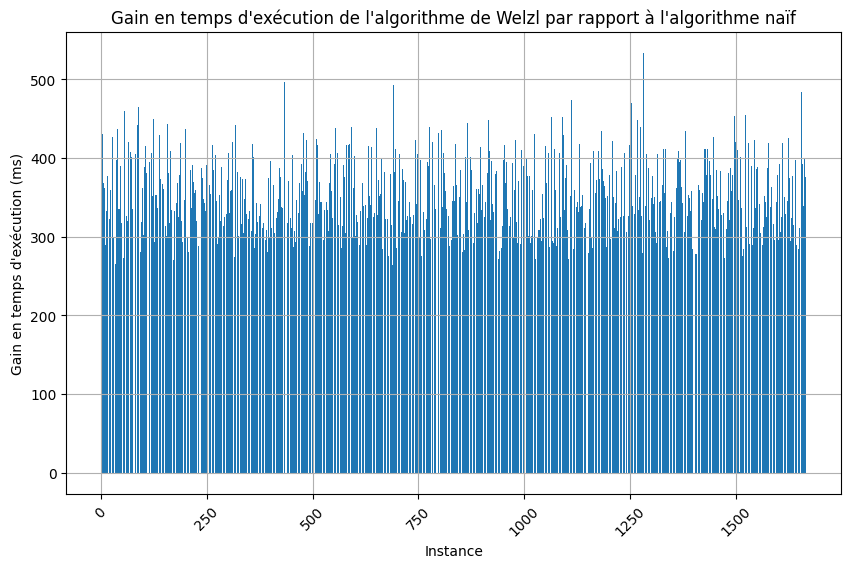

In [6]:
# Calculer le gain en temps d'exécution pour chaque fichier
gain_temps_execution = data['Temps d\'exécution naif'] - data['Temps d\'exécution Welzl']

# Créer le graphe
plt.figure(figsize=(10, 6))
plt.bar(data['numero_fichier'], gain_temps_execution)
plt.xlabel('Instance')
plt.ylabel('Gain en temps d\'exécution (ms)')
plt.title('Gain en temps d\'exécution de l\'algorithme de Welzl par rapport à l\'algorithme naïf')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("graphes/gain_temps.jpg")
plt.show()

In [7]:
# Filtrer les données où le gain est négatif ou égal à zéro
valeurs_negatives = data[data['Temps d\'exécution naif'] - data['Temps d\'exécution Welzl'] <= 0]

# Imprimer pour chaque donnée dans valeurs_negatives
print("Numéro du fichier | Temps d'exécution Welzl | Temps d'exécution naif | Écart de temps")
for index, row in valeurs_negatives.iterrows():
    ecart_temps = row['Temps d\'exécution naif'] - row['Temps d\'exécution Welzl']
    print("{:<17} | {:<23} | {:<22} | {}".format(row['numero_fichier'], row['Temps d\'exécution Welzl'], row['Temps d\'exécution naif'], ecart_temps))


Numéro du fichier | Temps d'exécution Welzl | Temps d'exécution naif | Écart de temps
68                | 0.115                   | 0.098                  | -0.017
1149              | 0.153                   | 0.146                  | -0.007000000000000006
1325              | 0.359                   | 0.014                  | -0.345
746               | 0.264                   | 0.034                  | -0.23
773               | 0.22                    | 0.093                  | -0.127
1399              | 0.4                     | 0.242                  | -0.15800000000000003
781               | 0.727                   | 0.212                  | -0.515
530               | 0.531                   | 0.203                  | -0.328
80                | 0.498                   | 0.005                  | -0.493
436               | 0.331                   | 0.197                  | -0.134
1243              | 0.111                   | 0.1                    | -0.010999999999999996
988          

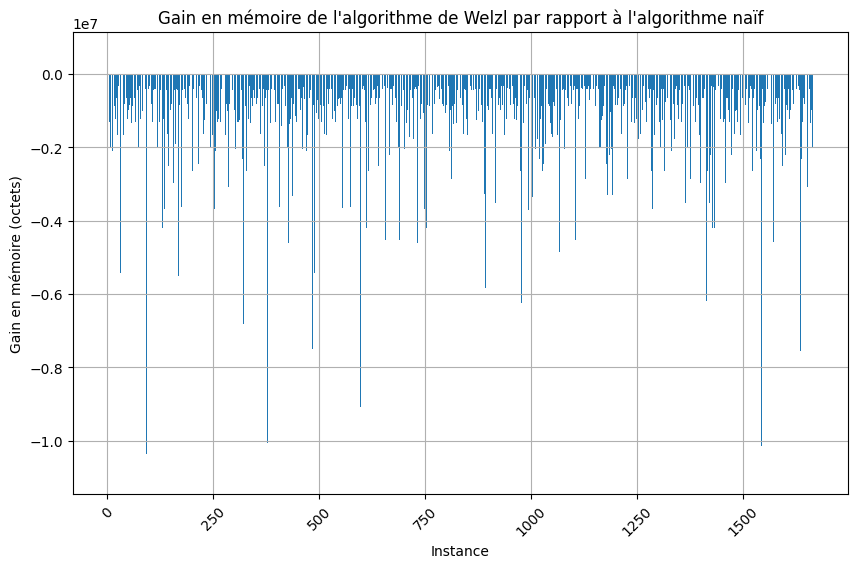

In [8]:
# Calculer le gain en consommation mémoire pour chaque fichier
gain_memoire = data['Consommation mémoire naif'] - data['Consommation mémoire Welzl']

# Créer le graphe
plt.figure(figsize=(10, 6))
plt.bar(data['numero_fichier'], gain_memoire)
plt.xlabel('Instance')
plt.ylabel('Gain en mémoire (octets)')
plt.title('Gain en mémoire de l\'algorithme de Welzl par rapport à l\'algorithme naïf')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("graphes/gain_memoire.jpg")
plt.show()

In [9]:
# Filtrer les données où le gain est positif ou égal à zéro
valeurs_positives = data[data['Consommation mémoire naif'] - data['Consommation mémoire Welzl'] >= 0]

# Imprimer pour chaque donnée dans valeurs_negatives
print("Numéro du fichier | Consommation mémoire Welzl | Consommation mémoire naif | Écart de consommation")
for index, row in valeurs_positives.iterrows():
    ecart_temps = row['Consommation mémoire naif'] - row['Consommation mémoire Welzl']
    print("{:<17} | {:<26} | {:<25} | {}".format(row['numero_fichier'], row['Temps d\'exécution Welzl'], row['Temps d\'exécution naif'], ecart_temps))


Numéro du fichier | Consommation mémoire Welzl | Consommation mémoire naif | Écart de consommation
205               | 37.977                     | 337.938                   | 576328.0
276               | 0.383                      | 291.3                     | 0.0
422               | 0.101                      | 387.363                   | 0.0
765               | 0.351                      | 318.613                   | 0.0
515               | 0.262                      | 340.671                   | 0.0
947               | 0.287                      | 305.992                   | 0.0
1328              | 0.264                      | 411.747                   | 0.0
1191              | 0.211                      | 348.935                   | 0.0
530               | 0.531                      | 0.203                     | 0.0
792               | 0.342                      | 303.113                   | 0.0
1209              | 0.174                      | 359.05                    | 0.0
80   

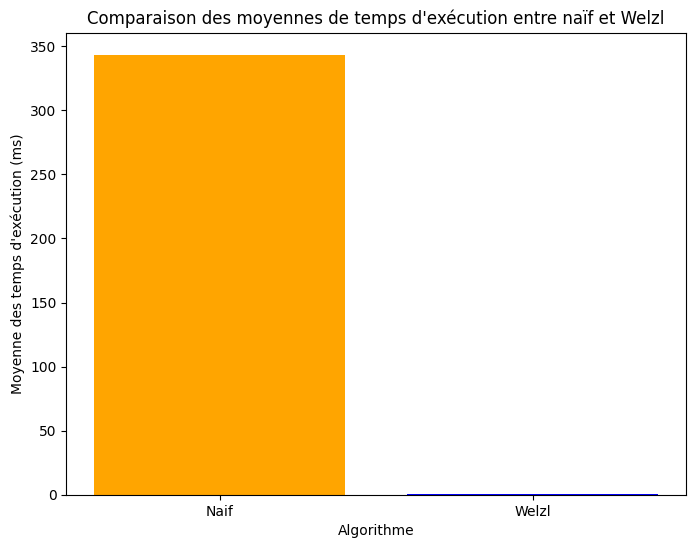

Moyenne des temps d'exécution de Welzl : 0.4657239927841251 ms
Moyenne des temps d'exécution du Naïf : 343.3826764882742 ms


In [10]:
# Calculer la moyenne des temps d'exécution pour chaque algorithme
moyenne_welzl = data['Temps d\'exécution Welzl'].mean()
moyenne_naif = data['Temps d\'exécution naif'].mean()

# Créer un DataFrame pour les moyennes
moyennes_df = pd.DataFrame({'Algorithme': ['Naif', 'Welzl'],
                            'Moyenne temps d\'exécution': [moyenne_naif, moyenne_welzl]})

# Créer le diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(moyennes_df['Algorithme'], moyennes_df['Moyenne temps d\'exécution'], color=['orange', 'blue'])
plt.xlabel('Algorithme')
plt.ylabel('Moyenne des temps d\'exécution (ms)')
plt.title('Comparaison des moyennes de temps d\'exécution entre naïf et Welzl')
plt.savefig("graphes/moyenne_temps.jpg")
plt.show()

print("Moyenne des temps d'exécution de Welzl :", moyenne_welzl, "ms")
print("Moyenne des temps d'exécution du Naïf :", moyenne_naif, "ms")

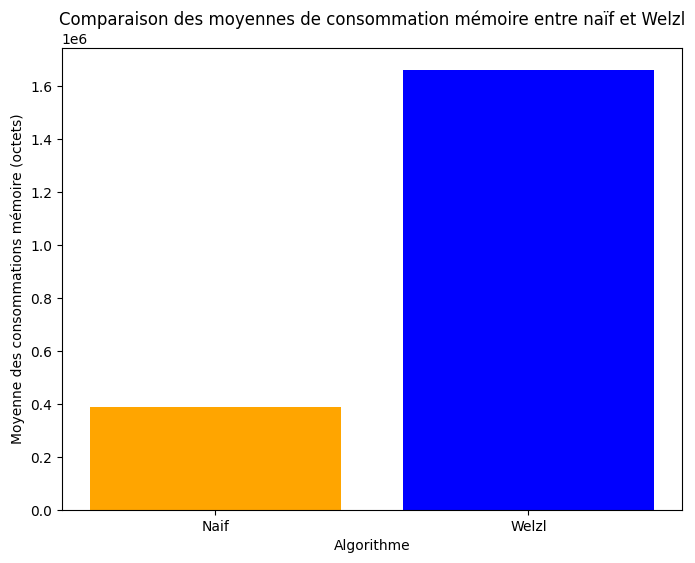

Moyenne des consommations mémoire de Welzl : 1660471.7931449187 octets
Moyenne des consommations mémoire du Naïf : 388469.248346362 octets


In [11]:
# Calculer la moyenne de la consommation mémoire pour chaque algorithme
moyenne_memoire_welzl = data['Consommation mémoire Welzl'].mean()
moyenne_memoire_naif = data['Consommation mémoire naif'].mean()

# Créer un DataFrame pour les moyennes de consommation mémoire
moyennes_memoire_df = pd.DataFrame({'Algorithme': ['Naif', 'Welzl'],
                                    'Moyenne consommation mémoire': [moyenne_memoire_naif, moyenne_memoire_welzl]})

# Créer le diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(moyennes_memoire_df['Algorithme'], moyennes_memoire_df['Moyenne consommation mémoire'], color=['orange', 'blue'])
plt.xlabel('Algorithme')
plt.ylabel('Moyenne des consommations mémoire (octets)')
plt.title('Comparaison des moyennes de consommation mémoire entre naïf et Welzl')
plt.savefig("graphes/moyenne_memoire.jpg")
plt.show()

print("Moyenne des consommations mémoire de Welzl :", moyenne_memoire_welzl, "octets")
print("Moyenne des consommations mémoire du Naïf :", moyenne_memoire_naif, "octets")

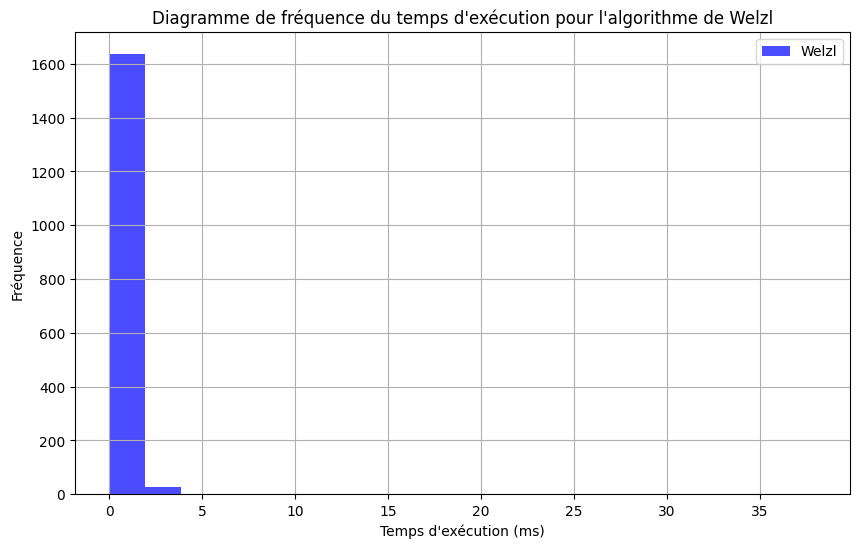

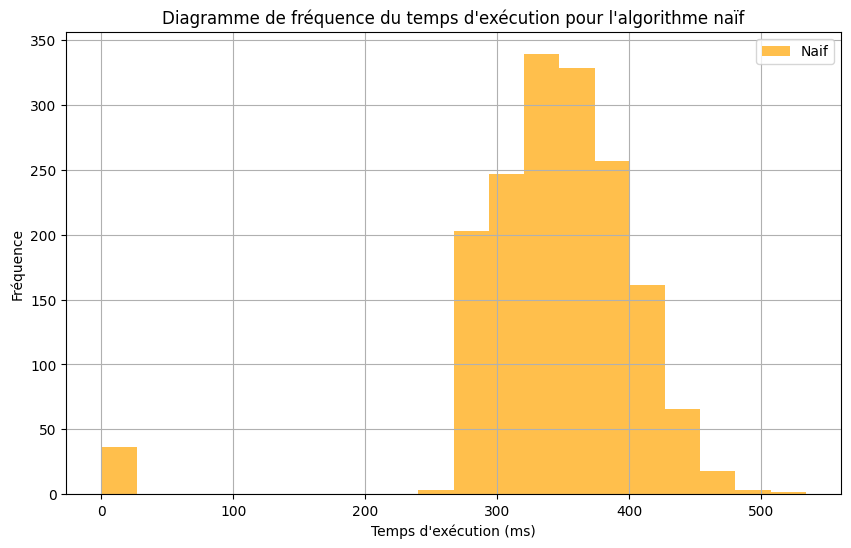

In [31]:
# Créer le diagramme de fréquence pour l'algorithme de Welzl
plt.figure(figsize=(10, 6))
plt.hist(data['Temps d\'exécution Welzl'], bins=20, color='blue', alpha=0.7, label='Welzl')
plt.xlabel('Temps d\'exécution (ms)')
plt.ylabel('Fréquence')
plt.title('Diagramme de fréquence du temps d\'exécution pour l\'algorithme de Welzl')
plt.legend()
plt.grid(True)
plt.savefig("graphes/frequence_temps_welzl.jpg")
plt.show()

# Créer le diagramme de fréquence pour l'algorithme naïf
plt.figure(figsize=(10, 6))
plt.hist(data['Temps d\'exécution naif'], bins=20, color='orange', alpha=0.7, label='Naif')
plt.xlabel('Temps d\'exécution (ms)')
plt.ylabel('Fréquence')
plt.title('Diagramme de fréquence du temps d\'exécution pour l\'algorithme naïf')
plt.legend()
plt.grid(True)
plt.savefig("graphes/frequence_temps_naif.jpg")
plt.show()

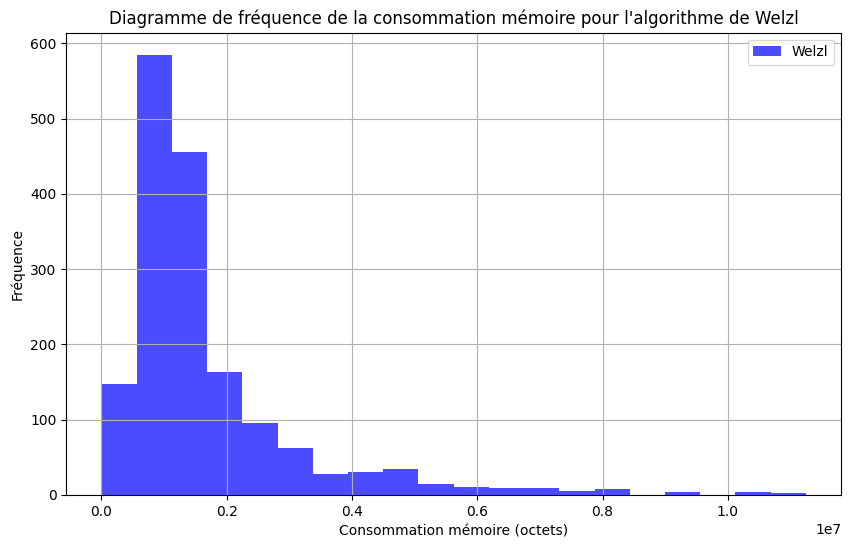

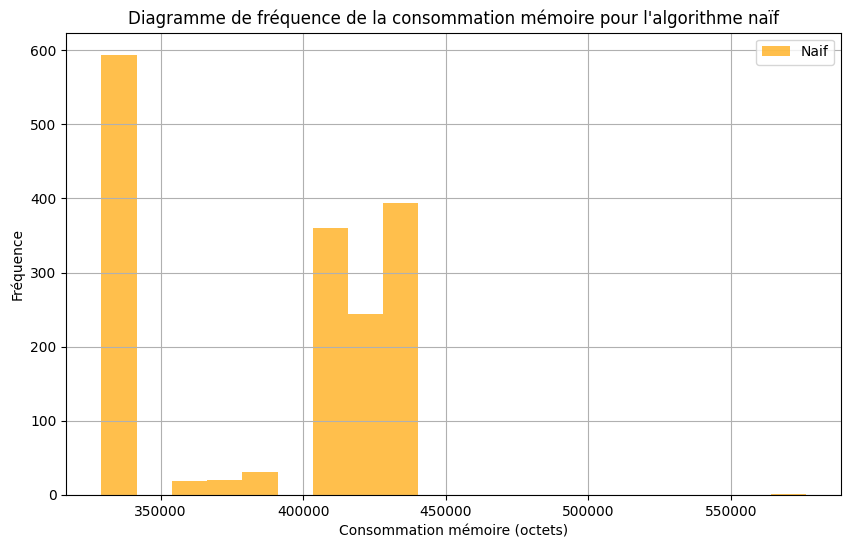

In [32]:
# Créer le diagramme de fréquence pour l'algorithme de Welzl
plt.figure(figsize=(10, 6))
plt.hist(data['Consommation mémoire Welzl'], bins=20, color='blue', alpha=0.7, label='Welzl')
plt.xlabel('Consommation mémoire (octets)')
plt.ylabel('Fréquence')
plt.title('Diagramme de fréquence de la consommation mémoire pour l\'algorithme de Welzl')
plt.legend()
plt.grid(True)
plt.savefig("graphes/frequence_memoire_welzl.jpg")
plt.show()

# Créer le diagramme de fréquence pour l'algorithme naïf
plt.figure(figsize=(10, 6))
plt.hist(data['Consommation mémoire naif'], bins=20, color='orange', alpha=0.7, label='Naif')
plt.xlabel('Consommation mémoire (octets)')
plt.ylabel('Fréquence')
plt.title('Diagramme de fréquence de la consommation mémoire pour l\'algorithme naïf')
plt.legend()
plt.grid(True)
plt.savefig("graphes/frequence_memoire_naif.jpg")
plt.show()


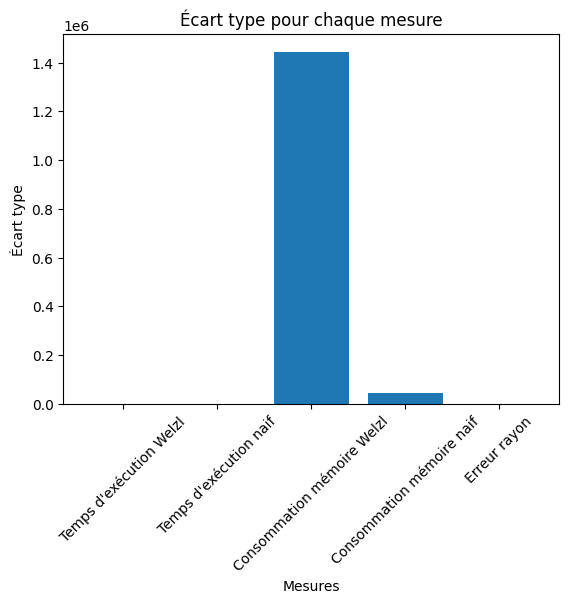

Écart type temps d'exécution Welzl : 1.0118904173845298
Écart type temps d'exécution naif : 68.239434374494
Écart type consommation mémoire Welzl : 1444282.5191054798
Écart type consommation mémoire naif : 45536.528219990425
Écart type erreur rayon : 2.9109508371477584


In [15]:
# Calculer l'écart type pour chaque mesure
ecart_type_welzl = data['Temps d\'exécution Welzl'].std()
ecart_type_naif = data['Temps d\'exécution naif'].std()
ecart_type_mem_welzl = data['Consommation mémoire Welzl'].std()
ecart_type_mem_naif = data['Consommation mémoire naif'].std()
ecart_type_erreur_rayon = data['Erreur rayon'].std()

# Créer un diagramme à bâtons pour les écarts types
mesures = ['Temps d\'exécution Welzl', 'Temps d\'exécution naif', 'Consommation mémoire Welzl', 'Consommation mémoire naif', 'Erreur rayon']
ecarts_types = [ecart_type_welzl, ecart_type_naif, ecart_type_mem_welzl, ecart_type_mem_naif, ecart_type_erreur_rayon]

plt.bar(mesures, ecarts_types)
plt.xlabel('Mesures')
plt.ylabel('Écart type')
plt.title('Écart type pour chaque mesure')
plt.xticks(rotation=45)
plt.show()

print("Écart type temps d\'exécution Welzl :", ecart_type_welzl)
print("Écart type temps d\'exécution naif :", ecart_type_naif)
print("Écart type consommation mémoire Welzl :", ecart_type_mem_welzl)
print("Écart type consommation mémoire naif :", ecart_type_mem_naif)
print("Écart type erreur rayon :", ecart_type_erreur_rayon)